### Librerias y Dataset

In [1]:
import pandas as pd #Libreria para la manipulacion de datos
import numpy as np #Libreria para la manipulacion de datos numericos
import seaborn as sns #Libreria para la visualizacion de datos
import matplotlib.pyplot as plt #Libreria para la visualizacion de datos

In [2]:
df = pd.read_csv("dataset.csv") #Cargar el archivo CSV en un DataFrame de pandas
pd.set_option("display.max_columns",None) #Mostrar todas las columnas del DataFrame

In [3]:
df.shape #Mostrar la forma del DataFrame (filas, columnas)

(500, 10)

In [4]:
df.head() #Mostrar las primeras filas del DataFrame

,fecha_venta,tipo_empanada,sucursal,medio_pago,metodo_compra,cliente,unidades,precio_total,calificacion,tiempo_entrega_min
0,2023-04-08 00:21,Carne Picante,Sucursal Oeste,Tarjeta Crédito,Web,Nuevo,5,11.80,NaN,NaN
1,2023-03-04 11:09,Caprese,Sucursal Sur,Tarjeta Crédito,Delivery,Habitual,11,19.36,NaN,36.0
2,2023-05-31 03:45,Cebolla y Queso,Sucursal Norte,Tarjeta Débito,Presencial,Nuevo,2,2.26,5.0,NaN
3,2023-01-04 04:41,Verdura,Sucursal Oeste,Efectivo,Delivery,Nuevo,7,12.32,2.0,42.0
4,2023-07-25 18:45,Caprese,Sucursal Oeste,MercadoPago,Delivery,Nuevo,6,12.96,2.0,37.0


In [5]:
df.info() #Mostrar la informacion del DataFrame (tipos de datos, valores nulos, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha_venta         500 non-null    object 
 1   tipo_empanada       500 non-null    object 
 2   sucursal            500 non-null    object 
 3   medio_pago          500 non-null    object 
 4   metodo_compra       500 non-null    object 
 5   cliente             500 non-null    object 
 6   unidades            500 non-null    int64  
 7   precio_total        500 non-null    float64
 8   calificacion        385 non-null    float64
 9   tiempo_entrega_min  168 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 39.2+ KB


In [6]:
df.columns #Mostrar los nombres de las columnas del DataFrame

Index(['fecha_venta', 'tipo_empanada', 'sucursal', 'medio_pago',
       'metodo_compra', 'cliente', 'unidades', 'precio_total', 'calificacion',
       'tiempo_entrega_min'],
      dtype='object')

### Tratamiento de variables 

In [7]:

df['fecha'] = pd.to_datetime(df['fecha_venta']) #Convertir la columna 'fecha_venta' a tipo datetime

In [8]:
df.isnull().sum() #Contar los valores nulos en cada columna del DataFrame

fecha_venta             0
tipo_empanada           0
sucursal                0
medio_pago              0
metodo_compra           0
cliente                 0
unidades                0
precio_total            0
calificacion          115
tiempo_entrega_min    332
fecha                   0
dtype: int64

In [9]:
df["calificacion"].value_counts() #Contar los valores únicos en la columna 'calificacion'

calificacion
4.0    116
5.0    103
1.0     70
2.0     58
3.0     38
Name: count, dtype: int64

In [10]:
df.loc[df["metodo_compra"]=="Delivery"] #Filtrar el DataFrame para mostrar solo las filas donde 'metodo_compra' es "Delivery"

,fecha_venta,tipo_empanada,sucursal,medio_pago,metodo_compra,cliente,unidades,precio_total,calificacion,tiempo_entrega_min,fecha
1,2023-03-04 11:09,Caprese,Sucursal Sur,Tarjeta Crédito,Delivery,Habitual,11,19.36,NaN,36.0,2023-03-04 11:09:00
3,2023-01-04 04:41,Verdura,Sucursal Oeste,Efectivo,Delivery,Nuevo,7,12.32,2.0,42.0,2023-01-04 04:41:00
4,2023-07-25 18:45,Caprese,Sucursal Oeste,MercadoPago,Delivery,Nuevo,6,12.96,2.0,37.0,2023-07-25 18:45:00
6,2023-10-31 17:37,Carne,Sucursal Palermo,Efectivo,Delivery,Habitual,12,12.12,4.0,15.0,2023-10-31 17:37:00
11,2023-04-18 14:05,Humita,Sucursal Norte,MercadoPago,Delivery,Habitual,1,1.11,1.0,40.0,2023-04-18 14:05:00
...,...,...,...,...,...,...,...,...,...,...,...
478,2023-04-13 22:04,Caprese,Sucursal Centro,Tarjeta Crédito,Delivery,Habitual,2,2.02,NaN,46.0,2023-04-13 22:04:00
482,2023-11-08 09:50,Humita,Sucursal Centro,Tarjeta Crédito,Delivery,Habitual,3,7.38,5.0,12.0,2023-11-08 09:50:00
485,2023-01-23 23:07,Verdura,Sucursal Sur,MercadoPago,Delivery,Habitual,9,21.42,4.0,30.0,2023-01-23 23:07:00
489,2023-11-02 16:09,Pollo,Sucursal Palermo,Tarjeta Débito,Delivery,Habitual,4,4.84,4.0,24.0,2023-11-02 16:09:00


In [11]:
df.loc[df["cliente"]=="Nuevo"] #Filtrar el DataFrame para mostrar solo las filas donde 'cliente' es "Nuevo"

,fecha_venta,tipo_empanada,sucursal,medio_pago,metodo_compra,cliente,unidades,precio_total,calificacion,tiempo_entrega_min,fecha
0,2023-04-08 00:21,Carne Picante,Sucursal Oeste,Tarjeta Crédito,Web,Nuevo,5,11.80,NaN,NaN,2023-04-08 00:21:00
2,2023-05-31 03:45,Cebolla y Queso,Sucursal Norte,Tarjeta Débito,Presencial,Nuevo,2,2.26,5.0,NaN,2023-05-31 03:45:00
3,2023-01-04 04:41,Verdura,Sucursal Oeste,Efectivo,Delivery,Nuevo,7,12.32,2.0,42.0,2023-01-04 04:41:00
4,2023-07-25 18:45,Caprese,Sucursal Oeste,MercadoPago,Delivery,Nuevo,6,12.96,2.0,37.0,2023-07-25 18:45:00
5,2023-10-08 02:16,Caprese,Sucursal Sur,MercadoPago,Web,Nuevo,2,4.02,1.0,NaN,2023-10-08 02:16:00
...,...,...,...,...,...,...,...,...,...,...,...
479,2023-07-23 06:35,Jamon y Queso,Sucursal Sur,MercadoPago,Web,Nuevo,12,21.48,5.0,NaN,2023-07-23 06:35:00
483,2023-05-09 11:27,Humita,Sucursal Oeste,Tarjeta Débito,Web,Nuevo,6,7.74,5.0,NaN,2023-05-09 11:27:00
484,2023-09-07 01:02,Dulce de Leche,Sucursal Oeste,Efectivo,Presencial,Nuevo,10,13.00,NaN,NaN,2023-09-07 01:02:00
496,2023-06-21 21:45,Carne Picante,Sucursal Oeste,Tarjeta Débito,Web,Nuevo,8,14.40,2.0,NaN,2023-06-21 21:45:00


In [12]:
df.groupby("sucursal")["calificacion"].mean() #Agrupar el DataFrame por 'sucursal' y calcular la media de 'calificacion' para cada grupo

sucursal
Sucursal Centro     3.000000
Sucursal Norte      3.255814
Sucursal Oeste      3.545455
Sucursal Palermo    3.397260
Sucursal Sur        3.420455
Name: calificacion, dtype: float64

In [13]:
df['sucursal'] = df['sucursal'].replace('Sucursal Palermo', 'Sucursal Norte') #Reemplazar 'Sucursal Palermo' por 'Sucursal Norte' en la columna 'sucursal'

In [14]:
df.groupby("metodo_compra")["calificacion"].mean() #Agrupar el DataFrame por 'metodo_compra' y calcular la media de 'calificacion' para cada grupo

metodo_compra
Delivery      2.875000
Presencial    4.523364
Web           2.843284
Name: calificacion, dtype: float64

In [15]:
df["calificacion"] = df["calificacion"].fillna(
    df.groupby("metodo_compra")["calificacion"].transform("mean")
) #Rellenar los valores nulos en 'calificacion' con la media de 'calificacion' agrupada por 'metodo_compra'

In [16]:
df.isnull().sum() #Contar los valores nulos en cada columna del DataFrame

fecha_venta             0
tipo_empanada           0
sucursal                0
medio_pago              0
metodo_compra           0
cliente                 0
unidades                0
precio_total            0
calificacion            0
tiempo_entrega_min    332
fecha                   0
dtype: int64

In [17]:
df["tiempo_entrega_min"] = df["tiempo_entrega_min"].fillna(
df.groupby("sucursal")["tiempo_entrega_min"].transform("mean")) #Rellenar los valores nulos en 'tiempo_entrega_min' con la media de 'tiempo_entrega_min' agrupada por 'sucursal'

In [18]:
df.isnull().sum() #Contar los valores nulos en cada columna del DataFrame

fecha_venta           0
tipo_empanada         0
sucursal              0
medio_pago            0
metodo_compra         0
cliente               0
unidades              0
precio_total          0
calificacion          0
tiempo_entrega_min    0
fecha                 0
dtype: int64

In [19]:
df = df[df['tipo_empanada'] != 'Dulce de Leche'] 

In [20]:
df["medio_pago"].value_counts() #Contar los valores únicos en la columna 'medio_pago'

medio_pago
Tarjeta Débito     124
Tarjeta Crédito    119
MercadoPago        108
Efectivo           101
Name: count, dtype: int64

In [21]:
df['medio_pago'] = df['medio_pago'].replace('MercadoPago', 'Transferencia') #Reemplazar 'MercadoPago' por 'Transferencia' en la columna 'medio_pago'


In [22]:
df.to_csv('empanadas_don_pedro_limpio.csv', index=False) #Guardar el DataFrame limpio en un nuevo archivo CSV

In [23]:
df=pd.read_csv("empanadas_don_pedro_limpio.csv") #Cargar el archivo CSV en un DataFrame de pandas

### Analisis

In [24]:
df.columns #Mostrar los nombres de las columnas del DataFrame
df.describe() #Mostrar estadisticas descriptivas del DataFrame (media, mediana, etc.)

,unidades,precio_total,calificacion,tiempo_entrega_min
count,452.000000,452.000000,452.000000,452.000000
mean,6.626106,11.602190,3.458125,34.919037
std,3.520548,7.025518,1.359470,8.860162
min,1.000000,1.030000,1.000000,10.000000
25%,4.000000,5.990000,2.632463,29.636364
50%,6.000000,10.885000,4.000000,36.162162
75%,10.000000,16.000000,4.523364,37.727273
max,12.000000,30.000000,5.000000,60.000000


### Serie temporal de ventas

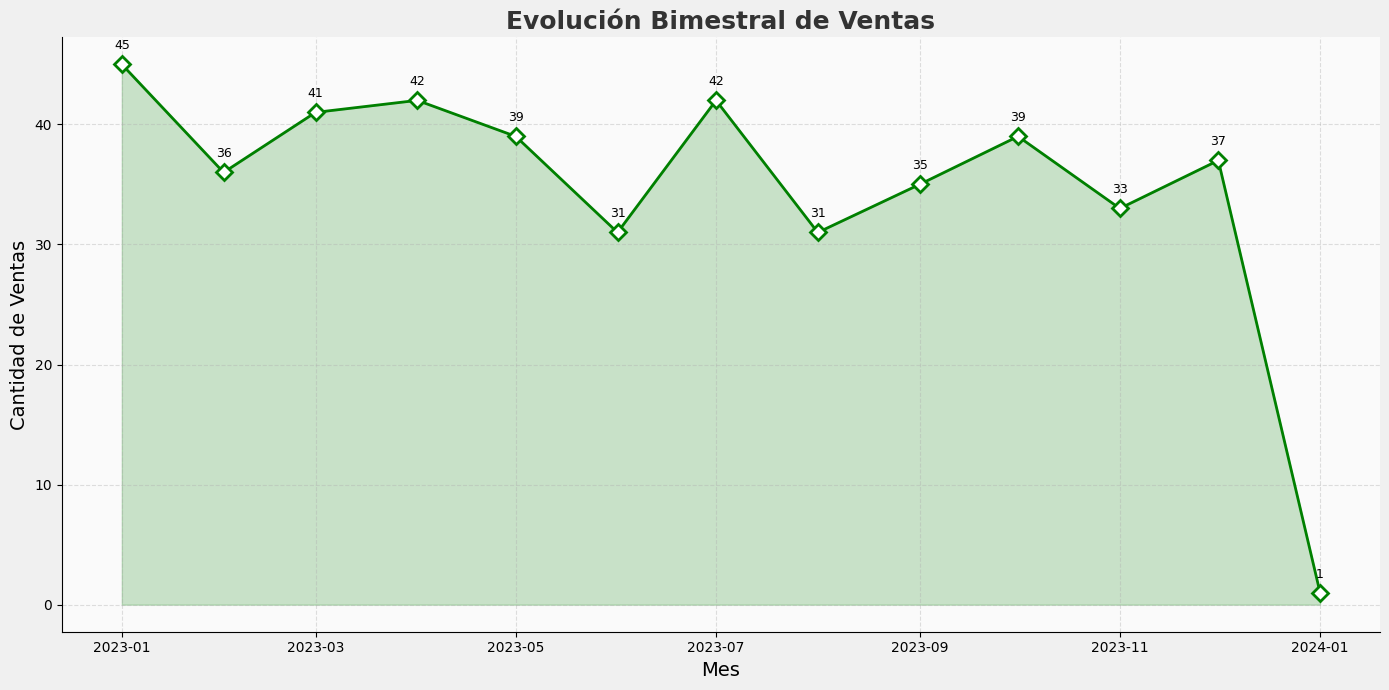

In [25]:
# Asegurar de convertir la columna a datetime
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

# Agrupar por mes
ventas_mensuales = df['fecha_venta'].dt.to_period('M').value_counts().sort_index()
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

# Crear figura
plt.figure(figsize=(14, 7))

# Datos
x = ventas_mensuales.index
y = ventas_mensuales.values

# Línea principal
plt.plot(x, y, marker='D', linestyle='-', linewidth=2, color='green', markersize=8,
         markerfacecolor='white', markeredgewidth=2, label='Ventas')

# Gradiente (relleno debajo de la línea)
plt.fill_between(x, y, color='green', alpha=0.2)

# Etiquetas de cada punto
for i, value in enumerate(y):
    plt.text(x[i], value + 1, str(value), ha='center', va='bottom', fontsize=9, color='black')

# Estética
plt.title('Evolución Bimestral de Ventas', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Ventas', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)

# Fondo suave
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('#F0F0F0')

# Quitar bordes innecesarios
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Mostrar
plt.tight_layout()
plt.show()


### Cuanto recaudo cada sucursal?

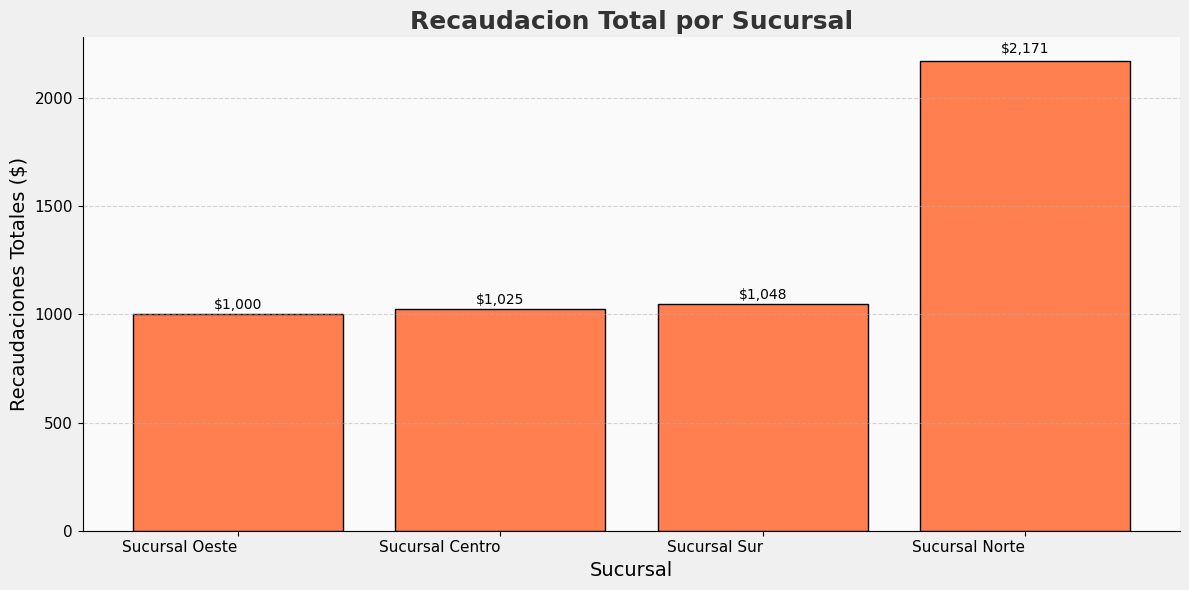

In [26]:
# Agrupación por sucursal
sucursal_totales = df.groupby("sucursal")["precio_total"].sum().sort_values()

# Crear figura
plt.figure(figsize=(12, 6))
bars = plt.bar(sucursal_totales.index, sucursal_totales.values, color="coral", edgecolor='black', linewidth=1)

# Título y ejes
plt.title("Recaudacion Total por Sucursal", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Sucursal", fontsize=14)
plt.ylabel("Recaudaciones Totales ($)", fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Etiquetas arriba de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + yval*0.01, f"${yval:,.0f}", 
             ha='center', va='bottom', fontsize=10, color='black')

# Fondo y estilo
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('#F0F0F0')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Quitar bordes innecesarios
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Ajuste final
plt.tight_layout()
plt.show()

### Que variedad de empanada se vende mas?

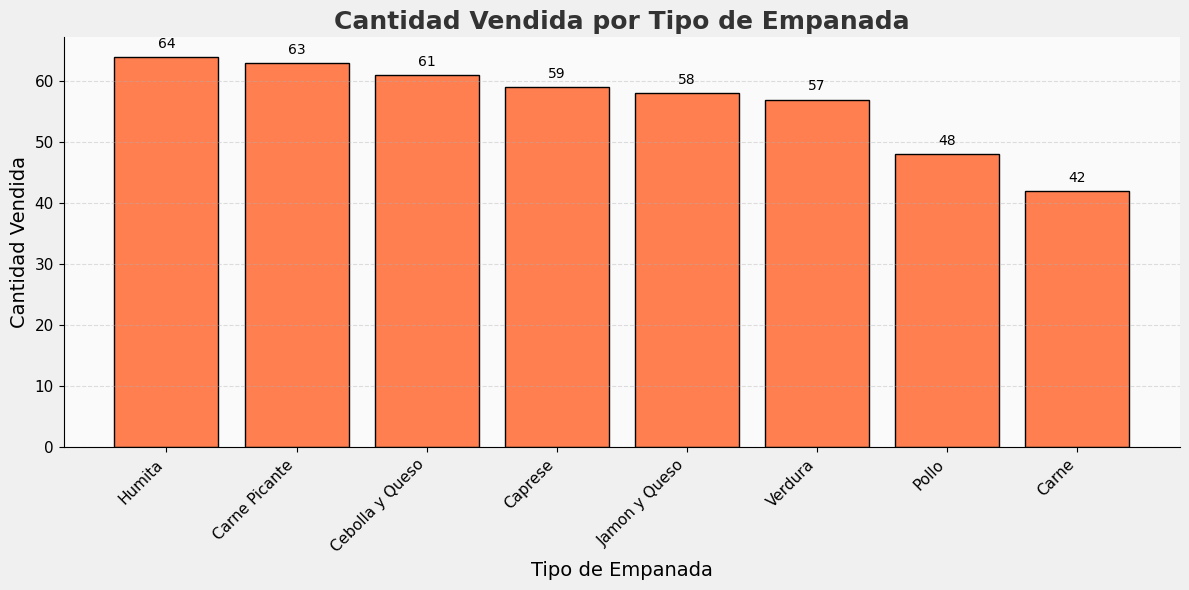

In [27]:

tipo_counts = df["tipo_empanada"].value_counts()

# Estilo de color de Seaborn
colors = sns.color_palette("Set2", len(tipo_counts))

# Crear gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(tipo_counts.index, tipo_counts.values, color="coral", edgecolor='black')

# Título y ejes
plt.title("Cantidad Vendida por Tipo de Empanada", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Tipo de Empanada", fontsize=14)
plt.ylabel("Cantidad Vendida", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Etiquetas sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval}", 
             ha='center', va='bottom', fontsize=10, color='black')

# Estética del fondo
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('#F0F0F0')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Quitar bordes innecesarios
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Ajuste final
plt.tight_layout()
plt.show()


### Metodo de compra mas elegido

In [28]:
df["metodo_compra"].value_counts() #Contar los valores únicos en la columna 'metodo_compra'

metodo_compra
Presencial    159
Delivery      154
Web           139
Name: count, dtype: int64

### Existe una relacion entre el tiempo de entrega y la calificacion final?

Text(0.5, 1.0, 'Relacion(?)')

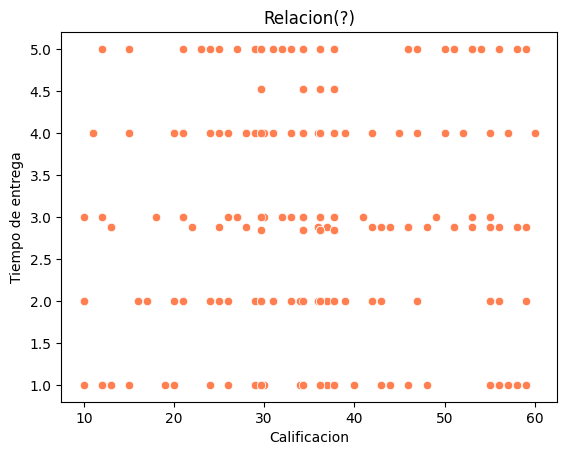

In [29]:
sns.scatterplot(data=df,x="tiempo_entrega_min",y="calificacion",c="coral")
plt.xlabel("Calificacion")
plt.ylabel("Tiempo de entrega")
plt.title("Relacion(?)")

### Calificacion promedio de cada sucursal

In [30]:
df.groupby("sucursal")["calificacion"].mean() #Agrupar el DataFrame por 'sucursal' y calcular la media de 'calificacion' para cada grupo

sucursal
Sucursal Centro    3.181368
Sucursal Norte     3.443290
Sucursal Oeste     3.712417
Sucursal Sur       3.494627
Name: calificacion, dtype: float64

### Calificacion maxima de cada sucursal

In [31]:
df.groupby("sucursal")["calificacion"].max() #Agrupar el DataFrame por 'sucursal' y calcular la media de 'calificacion' para cada grupo

sucursal
Sucursal Centro    5.0
Sucursal Norte     5.0
Sucursal Oeste     5.0
Sucursal Sur       5.0
Name: calificacion, dtype: float64

### Calificacion maxima de cada sucursal

In [32]:
df.groupby("sucursal")["calificacion"].min() #Agrupar el DataFrame por 'sucursal' y calcular la media de 'calificacion' para cada grupo

sucursal
Sucursal Centro    1.0
Sucursal Norte     1.0
Sucursal Oeste     1.0
Sucursal Sur       1.0
Name: calificacion, dtype: float64

### Demora promedio en la entrega por sucursal

In [33]:
df.groupby("sucursal")["tiempo_entrega_min"].mean() #Agrupar el DataFrame por 'sucursal' y calcular la media de 'tiempo_entrega_min' para cada grupo

sucursal
Sucursal Centro    29.511501
Sucursal Norte     36.081375
Sucursal Oeste     34.140805
Sucursal Sur       38.007421
Name: tiempo_entrega_min, dtype: float64

## Preprocesamiento e Implementacion de modelo

#### Objetivo = Prediccion de unidades totales vendidas
#### Modelo = Random Forest Regressor


In [34]:
from sklearn.preprocessing import OneHotEncoder #Libreria para la codificacion de variables categoricas

In [35]:
catecols = ["tipo_empanada","sucursal","medio_pago","cliente","metodo_compra"] #Lista de columnas categoricas

In [36]:
encoder = OneHotEncoder(sparse_output=False) #Crear un objeto OneHotEncoder para codificar variables categoricas
encoded = encoder.fit_transform(df[catecols]) #Codificar las columnas categoricas

In [37]:
columnas_nuevas = encoder.get_feature_names_out(catecols) #Obtener los nombres de las nuevas columnas codificadas
df_encoded = pd.DataFrame(encoded, columns=columnas_nuevas) #Crear un DataFrame con las nuevas columnas codificadas

In [38]:
df_encoded.head()

,tipo_empanada_Caprese,tipo_empanada_Carne,tipo_empanada_Carne Picante,tipo_empanada_Cebolla y Queso,tipo_empanada_Humita,tipo_empanada_Jamon y Queso,tipo_empanada_Pollo,tipo_empanada_Verdura,sucursal_Sucursal Centro,sucursal_Sucursal Norte,sucursal_Sucursal Oeste,sucursal_Sucursal Sur,medio_pago_Efectivo,medio_pago_Tarjeta Crédito,medio_pago_Tarjeta Débito,medio_pago_Transferencia,cliente_Habitual,cliente_Nuevo,metodo_compra_Delivery,metodo_compra_Presencial,metodo_compra_Web
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [39]:
df = pd.concat([df.drop(catecols, axis=1), df_encoded], axis=1) #Concatenar el DataFrame original sin las columnas categoricas con el DataFrame codificado

In [40]:
df.head() #Mostrar las primeras filas del DataFrame

,fecha_venta,unidades,precio_total,calificacion,tiempo_entrega_min,fecha,tipo_empanada_Caprese,tipo_empanada_Carne,tipo_empanada_Carne Picante,tipo_empanada_Cebolla y Queso,tipo_empanada_Humita,tipo_empanada_Jamon y Queso,tipo_empanada_Pollo,tipo_empanada_Verdura,sucursal_Sucursal Centro,sucursal_Sucursal Norte,sucursal_Sucursal Oeste,sucursal_Sucursal Sur,medio_pago_Efectivo,medio_pago_Tarjeta Crédito,medio_pago_Tarjeta Débito,medio_pago_Transferencia,cliente_Habitual,cliente_Nuevo,metodo_compra_Delivery,metodo_compra_Presencial,metodo_compra_Web
0,2023-04-08 00:21:00,5,11.80,2.843284,34.321429,2023-04-08 00:21:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2023-03-04 11:09:00,11,19.36,2.875000,36.000000,2023-03-04 11:09:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2023-05-31 03:45:00,2,2.26,5.000000,36.162162,2023-05-31 03:45:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2023-01-04 04:41:00,7,12.32,2.000000,42.000000,2023-01-04 04:41:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2023-07-25 18:45:00,6,12.96,2.000000,37.000000,2023-07-25 18:45:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [41]:
df_modelo1 = df.drop(columns=["fecha_venta","fecha"]) 

In [42]:
X = df_modelo1.drop("unidades", axis=1) 
y = df_modelo1["unidades"] 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score #Importar las metricas de error
from sklearn.model_selection import train_test_split # Para dividir el DataFrame en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) #Dividir el DataFrame en conjunto de entrenamiento y conjunto de prueba

# Modelo
from sklearn.ensemble import RandomForestRegressor #Importar el modelo RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_split=10,min_samples_leaf=2,random_state=123) #Crear un objeto RandomForestRegressor con los parametros especificados mediante testeo uno por uno
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"n_estimators={i} -> RMSE: {mean_squared_error(y_test, y_pred):.2f}, R²: {r2_score(y_test, y_pred):.3f}") #Enseñar los resultados de las metricas

n_estimators=12 -> RMSE: 2.44, R²: 0.808


In [ ]:
## Validacion Cruzada
from sklearn.model_selection import cross_val_score 
cvscore = cross_val_score(model, X, y, cv=5)
cvscore
np.mean(cvscore)

np.float64(0.8207124932049833)

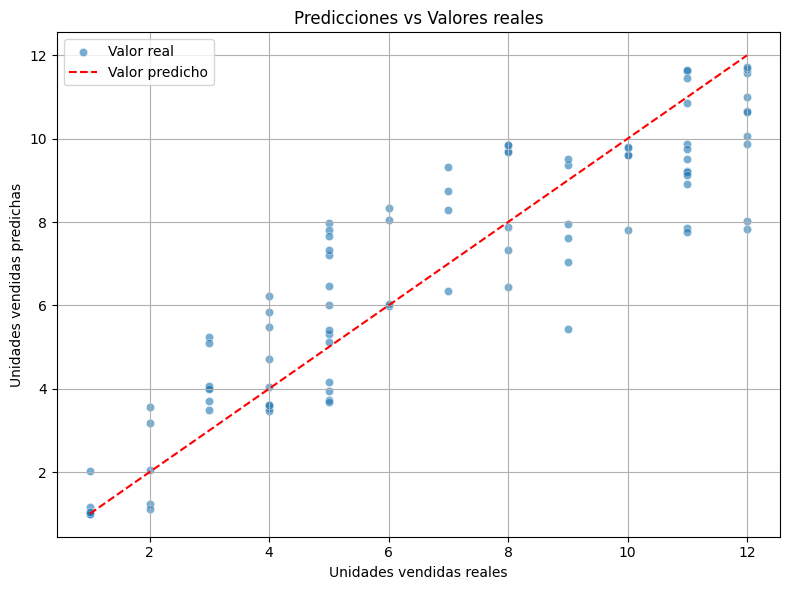

In [50]:
import matplotlib.pyplot as plt #Importar la libreria matplotlib para graficar
import seaborn as sns #Importar la libreria seaborn para graficar

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Unidades vendidas reales")
plt.ylabel("Unidades vendidas predichas")
plt.legend(["Valor real", "Valor predicho"], loc="upper left")
plt.title("Predicciones vs Valores reales")
plt.grid(True)
plt.tight_layout()
plt.show()